In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import os

In [6]:
# Get the current working directory
current_directory = os.getcwd()
print("Current directory:", current_directory)

file_path=os.path.join(current_directory,"Transformed_Data","EDA.csv")

Current directory: d:\Resume_Projects\Clustering\Clustering_MLOPS\Notebook\EDA


In [7]:
import pandas as pd

df = pd.read_csv(file_path, sep="\t")



In [8]:
columns_to_sum = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']

# Create a new column with the sum of specified columns
df['Food_Expense'] = df[columns_to_sum].sum(axis=1)


KeyError: "None of [Index(['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold'], dtype='object')] are in the [columns]"

In [766]:
def separate_columns(df, unique_threshold=5):
    """
    Separate numerical and categorical columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    - unique_threshold: threshold for considering a column as categorical based on unique values

    Returns:
    - numeric_columns: list of numerical columns
    - categorical_columns: list of categorical columns
    """
    numeric_columns = []
    categorical_columns = []

    for column in df.columns:
        if df[column].nunique() < unique_threshold:
            categorical_columns.append(column)
        elif pd.api.types.is_numeric_dtype(df[column]):
            numeric_columns.append(column)

    return numeric_columns, categorical_columns



numeric_columns, categorical_columns=separate_columns(df)

In [767]:
import numpy as np

In [768]:
df.shape

(2127, 25)

In [769]:
categorical_columns=['Education','Living_With','Total_Offsprings','Marital_Status','Complain'
                     ]

# Convert specified columns to categorical data type
df[categorical_columns] = df[categorical_columns].astype('category')

In [770]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing the data
# Separate features (X) and target variable (y)
X = df.drop(columns=['Total_Expenditure'])  # Exclude the target column from features
y = df[['Total_Expenditure']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1701, 24)
X_test shape: (426, 24)
y_train shape: (1701, 1)
y_test shape: (426, 1)


In [771]:
X

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,...,WebVisitsMonth,Complain,Response,Age,Living_With,Total_Offsprings,Family_Size,Total_Purchases,Campaigns_Accepted,Food_Expense
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,7,0,1,66,Alone,One Child,1,32,0,1617
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,5,0,0,69,Alone,Three or More Children,3,11,0,27
2,Graduate,Together,71613.0,26,426,49,127,111,21,42,...,4,0,0,58,Partner,One Child,2,25,0,776
3,Graduate,Together,26646.0,26,11,4,20,10,3,5,...,6,0,0,39,Partner,Two Children,3,14,0,53
4,Postgraduate,Married,58293.0,94,173,43,118,46,27,15,...,5,0,0,42,Partner,Two Children,3,24,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,Graduate,Married,61223.0,46,709,43,182,42,118,247,...,5,0,0,56,Partner,Two Children,3,23,0,1341
2123,Postgraduate,Together,64014.0,56,406,0,30,0,0,8,...,7,0,0,77,Partner,Three or More Children,5,29,1,444
2124,Graduate,Divorced,56981.0,91,908,48,217,32,12,24,...,6,0,0,42,Alone,One Child,1,25,1,1241
2125,Postgraduate,Together,69245.0,8,428,30,214,80,30,61,...,3,0,0,67,Partner,Two Children,3,26,0,843


In [772]:
def one_hot_encode_columns(dataframe, columns_to_encode):
    encoded_df = dataframe.copy()
    columns_to_drop = []  

    for column in columns_to_encode:
        print(f"Encoding column: {column}")
        encoded_column = pd.get_dummies(encoded_df[column], prefix=column, drop_first=True).astype(int)
        encoded_df = pd.concat([encoded_df, encoded_column], axis=1)
        columns_to_drop.append(column)

    # Drop non-numeric columns outside the loop
    encoded_df.drop(columns_to_drop, axis=1, inplace=True)

    
    return encoded_df

X_train=one_hot_encode_columns(dataframe=X_train, columns_to_encode=categorical_columns)

X_test=one_hot_encode_columns(dataframe=X_test, columns_to_encode=categorical_columns)

Encoding column: Education
Encoding column: Living_With
Encoding column: Total_Offsprings
Encoding column: Marital_Status
Encoding column: Complain
Encoding column: Education
Encoding column: Living_With
Encoding column: Total_Offsprings
Encoding column: Marital_Status
Encoding column: Complain


In [773]:
import statsmodels.api as sm
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

In [774]:
def plot_qq_plots(dataframe, column_labels, plots_per_row=3):
    # Check if the columns exist in the DataFrame
    for label in column_labels:
        if label not in dataframe.columns:
            raise ValueError(f"Column '{label}' not found in the DataFrame.")

    # Calculate the number of rows needed
    num_columns = len(column_labels)
    num_rows = (num_columns + plots_per_row - 1) // plots_per_row

    # Create Q-Q plots
    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 5 * num_rows))

    for i, label in enumerate(column_labels):
        row_idx = i // plots_per_row
        col_idx = i % plots_per_row

        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
        sm.qqplot(dataframe[label], line='s', ax=ax)
        ax.set_xlabel(f'Theoretical Quantiles for {label}')
        ax.set_ylabel(f'Sample Quantiles for {label}')
        ax.set_title(f'Q-Q Plot for {label}')

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()
    plt.show()

#plot_qq_plots(dataframe=X, column_labels=numeric_columns)

In [775]:

from sklearn.preprocessing import MinMaxScaler,RobustScaler
import numpy as np
import pandas as pd
import pandas as pd
from scipy.stats import boxcox


def standard_scale_columns(dataframe, columns_to_transform):
    """
    Standard scales specified numeric columns in the given DataFrame.

    Parameters:
    - dataframe: pandas DataFrame
    - columns_to_transform: list of column names to standard scale

    Returns:
    - pandas DataFrame with specified columns standard scaled
    """
    transformed_df = dataframe.copy()

    # Initialize the StandardScaler
    scaler = RobustScaler()

    for column in columns_to_transform:
        if column in transformed_df.columns:
            # Reshape the data for StandardScaler
            column_data = transformed_df[column].values.reshape(-1, 1)

            # Standard scale the data
            transformed_column = scaler.fit_transform(column_data)

            # Update the DataFrame with the transformed column
            transformed_df[column] = transformed_column.flatten()

    return transformed_df




X_train=standard_scale_columns(dataframe=X_train, columns_to_transform=numeric_columns)
y_train=standard_scale_columns(dataframe=y_train, columns_to_transform=['Total_Expenditure'])


X_test=standard_scale_columns(dataframe=X_test, columns_to_transform=numeric_columns)
y_test=standard_scale_columns(dataframe=y_test, columns_to_transform=['Total_Expenditure'])







In [776]:
X_train

,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,DealsPurchases,Web,...,Education_Undergraduate,Living_With_Partner,Total_Offsprings_Three or More Children,Total_Offsprings_Two Children,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Complain_1
1233,0.296999,0.24,0.931478,-0.033333,0.442786,-0.045455,-0.266667,0.630435,1.5,1.50,...,0,1,0,1,0,0,0,1,0,0
480,-0.078056,0.88,0.143469,0.300000,0.009950,-0.090909,0.066667,-0.413043,0.5,0.50,...,0,1,1,0,0,1,0,0,0,0
1111,0.093153,-0.82,0.226981,0.433333,-0.009950,1.136364,0.433333,0.000000,0.0,-0.25,...,0,1,0,1,0,1,0,0,0,0
1303,0.000000,-0.20,0.034261,-0.100000,-0.004975,0.318182,0.400000,-0.239130,0.0,0.00,...,0,1,0,1,0,0,0,1,0,0
861,0.027125,-0.50,1.674518,-0.266667,0.024876,-0.272727,-0.266667,3.239130,2.0,1.50,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.141014,-0.26,-0.263383,-0.266667,-0.258706,-0.272727,-0.266667,-0.413043,0.0,-0.50,...,0,1,1,0,0,0,0,1,0,0
1095,0.876965,-0.60,1.042827,2.400000,2.074627,2.522727,0.166667,-0.260870,-0.5,-0.25,...,0,1,0,0,0,1,0,0,0,0
1130,0.585072,-0.76,1.698073,0.866667,0.353234,0.068182,-0.266667,-0.304348,0.0,0.25,...,0,1,0,1,0,1,0,0,0,0
1294,0.185617,0.94,-0.059957,-0.066667,-0.069652,-0.022727,0.000000,-0.173913,0.0,0.00,...,0,0,0,1,0,0,1,0,0,0


In [777]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

class PCATransformer:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.pca = PCA(n_components=n_components)
        self.columns = None

    def fit_transform(self, data, feature_names=None):
        transformed_data = self.pca.fit_transform(data)
        self.columns = [f"PC_{i+1}" for i in range(transformed_data.shape[1])]
        return pd.DataFrame(transformed_data, columns=self.columns)

    def transform(self, data):
        transformed_data = self.pca.transform(data)
        return pd.DataFrame(transformed_data, columns=self.columns)

    def plot_variance(self):
        explained_variance_ratio = self.pca.explained_variance_ratio_
        cumulative_variance = np.cumsum(explained_variance_ratio)

        plt.figure(figsize=(10, 6))
        plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.75, align='center',
                label='Individual explained variance')
        plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
                 label='Cumulative explained variance')
        plt.title('Explained Variance by Principal Components')
        plt.xlabel('Principal Components')
        plt.ylabel('Explained Variance Ratio')
        plt.legend(loc='best')
        plt.show()

    def plot_feature_importance(self, original_feature_names):
        if self.columns is None:
            raise ValueError("The transformer must be fitted before plotting feature importance.")

        loadings = self.pca.components_

        plt.figure(figsize=(12, 8))
        for i, pc in enumerate(self.columns):
            plt.bar(original_feature_names, loadings[i, :], label=f'{pc} Loading')

        plt.title('Feature Importance by Principal Components')
        plt.xlabel('Original Features')
        plt.ylabel('Loading Value')
        plt.legend(loc='best')
        plt.xticks(rotation='vertical')
        plt.show()

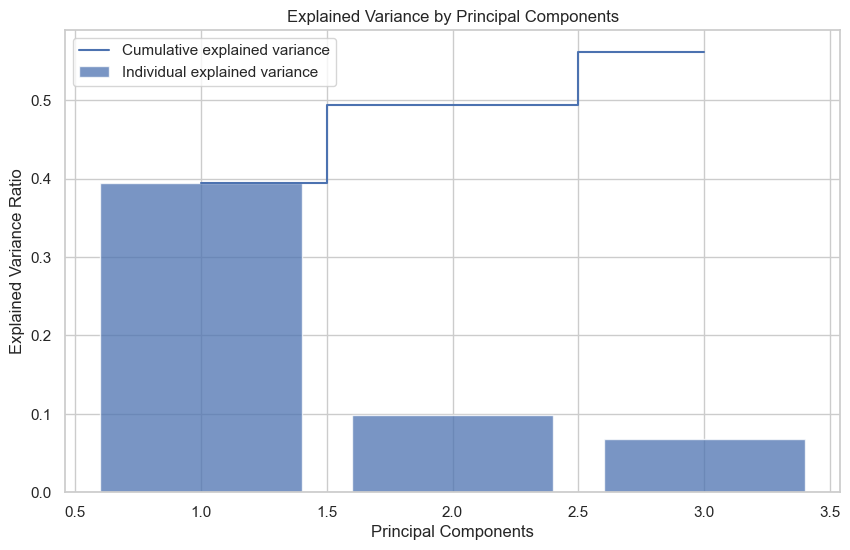

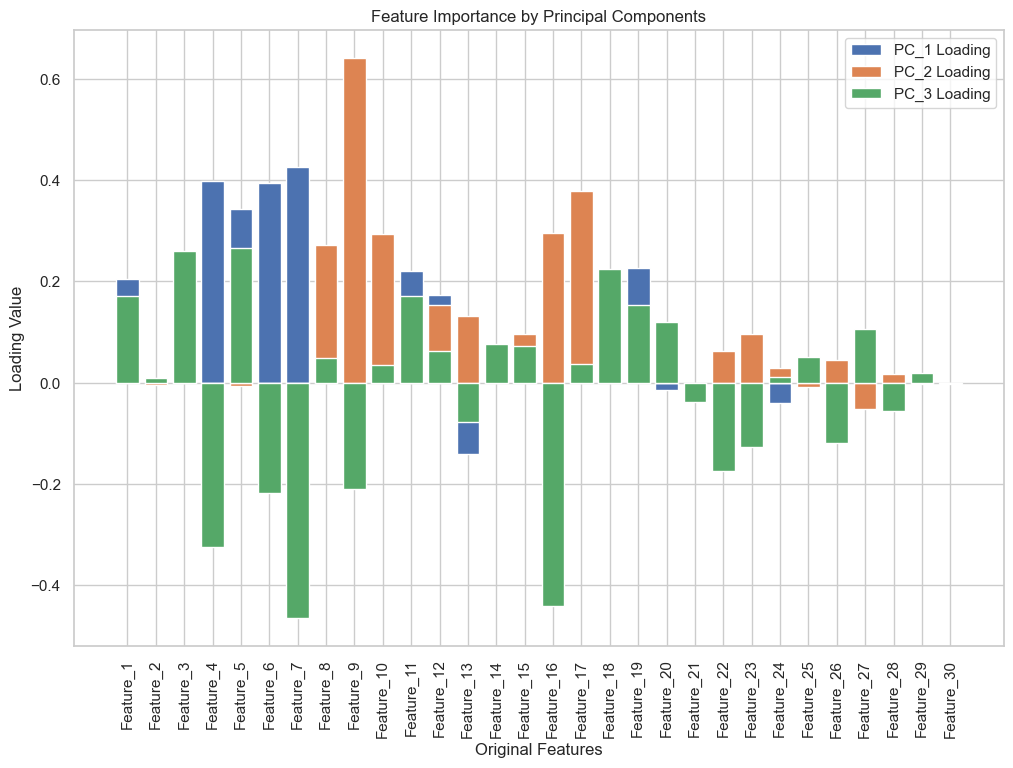

In [778]:
# Create and fit the PCA transformer on the training data
pca_transformer = PCATransformer(n_components=3)
X_train_pca_df = pca_transformer.fit_transform(X_train)

# Transform the test data using the fitted transformer
X_test_pca_df = pca_transformer.transform(X_test)

# Plot the variance explained by each principal component
pca_transformer.plot_variance()

# Plot feature importance
original_feature_names = [f"Feature_{i+1}" for i in range(X_train.shape[1])]
pca_transformer.plot_feature_importance(original_feature_names)

In [779]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [780]:
from sklearn.cluster import KMeans

#### Elbow Point 

The elbow point, also known as the "elbow method" or "elbow curve," is a technique used to determine the optimal number of clusters in a dataset for clustering algorithms like k-means. The elbow point represents a balance between minimizing within-cluster variance (compactness) and maximizing between-cluster variance (separation).

WCSS


The Within-Cluster Sum of Squares (WCSS) is a useful metric in determining the optimal number of clusters in K-means clustering. The WCSS measures the compactness of the data points within each cluster. As the number of clusters increases, the WCSS tends to decrease because each data point can be assigned to a closer centroid. However, after a certain point, the improvement in WCSS diminishes significantly, resulting in a less significant decrease in subsequent iterations.

In [781]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def kmeans_elbow_plot(data, max_clusters):
    # Calculate sum of squared distances for different values of k
    wcss = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)  # Append the WCSS value

    # Plot the elbow plot
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
    plt.title('Elbow Plot for K-means Clustering', fontsize=15)
    plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.7)
    plt.show()

    return kmeans
    
    

d:\Resume_Projects\Clustering\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Resume_Projects\Clustering\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Resume_Projects\Clustering\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Resume_Projects\Clustering\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

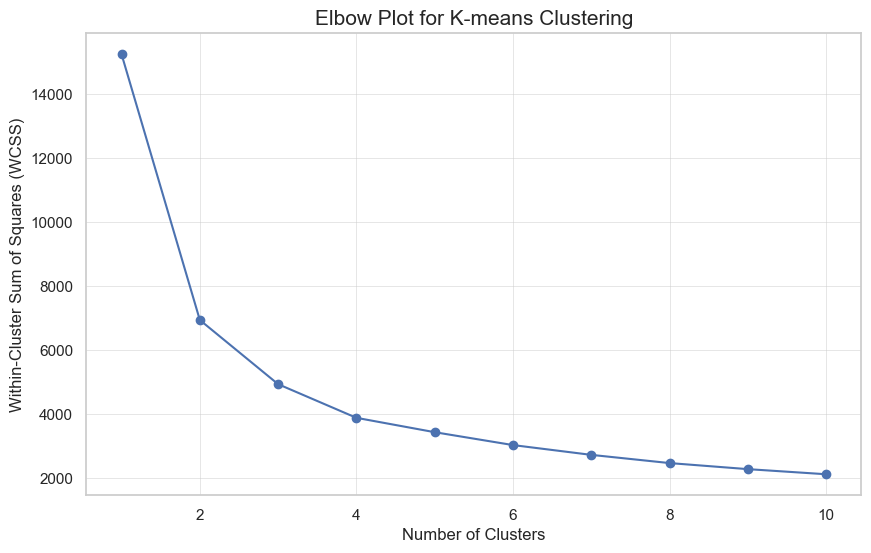

In [782]:
kmeans=kmeans_elbow_plot(X_train_pca_df,max_clusters=10)

In [783]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score


In [784]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

class Clustering:
    """
    EClustering is a class for performing clustering using various methods.
    """

    CLUSTERING_METHODS = {
        'kmeans': KMeans,
        'agglomerative': AgglomerativeClustering,
        'gmm': GaussianMixture
    }

    def __init__(self, method: str = 'kmeans', n_clusters: int = 3, n_components: int = 3):
        """
        Initialize the clustering model.

        Parameters:
        - method (str): The clustering method to use ('kmeans', 'agglomerative', 'gmm').
        - n_clusters (int): The number of clusters for kmeans and agglomerative methods.
        - n_components (int): The number of components for Gaussian Mixture Model.
        """
        self.method = method
        self.n_clusters = n_clusters
        self.n_components = n_components

        if method not in self.CLUSTERING_METHODS:
            raise ValueError(f"Unsupported clustering method: {method}")

        clustering_class = self.CLUSTERING_METHODS[method]
        if method in ['kmeans', 'agglomerative']:
            self.model = clustering_class(n_clusters=n_clusters)
        elif method == 'gmm':
            self.model = clustering_class(n_components=n_components)

    def fit(self, data):
        """
        Fit the clustering model to the input data.

        Parameters:
        - data: The input data for clustering.
        """
        self.model.fit(data)

    def predict(self, data):
        """
        Predict cluster labels for the input data.

        Parameters:
        - data: The input data for clustering.

        Returns:
        - labels: Cluster labels for each data point.
        """
        return self.model.fit_predict(data)

    def get_labels_and_method(self, data):
        """
        Get cluster labels and the clustering method for the input data.

        Parameters:
        - data: The input data for clustering.

        Returns:
        - labels: Cluster labels for each data point.
        - method: The clustering method used.
        """
        labels = self.predict(data)
        return labels, self.method

In [785]:

# Create and fit the clustering model on the data
clustering_model = Clustering(method='gmm', n_clusters=3)
clustering_model.fit(data=X_train_pca_df)

# Get cluster labels and the clustering algorithm name for training data
train_labels, method_used = clustering_model.get_labels_and_method(data=X_train_pca_df)

# Print the results for training data
print("Training Data - Cluster Labels:", train_labels)
print("Clustering Algorithm Used:", method_used)



# Apply the clustering model on the test data
test_labels = clustering_model.predict(data=X_test_pca_df)

# Print the results for test data
print("Test Data - Cluster Labels:", test_labels)

# Add the cluster labels to the original datasets
X_train[method_used] = train_labels
X_test[method_used] = test_labels

Training Data - Cluster Labels: [2 2 2 ... 2 2 0]
Clustering Algorithm Used: gmm
Test Data - Cluster Labels: [0 0 1 1 1 2 0 2 0 2 2 0 2 2 1 0 0 1 0 0 0 1 0 2 0 1 0 2 1 0 1 0 1 0 0 0 2
 2 2 0 2 1 2 2 2 2 0 0 0 0 0 2 2 2 1 2 0 0 2 0 1 2 0 2 0 0 0 0 0 0 1 2 2 2
 0 2 1 0 0 0 0 1 1 0 0 0 2 1 0 1 0 2 0 2 2 2 1 1 0 0 0 2 2 2 0 2 0 0 1 2 2
 0 2 1 0 0 1 1 1 2 2 0 0 1 1 0 1 2 0 0 0 1 1 2 0 0 1 0 2 2 1 0 0 2 2 1 2 1
 2 0 1 0 1 2 0 1 1 0 1 0 0 0 2 2 2 0 2 0 0 2 0 2 1 0 1 0 0 0 1 0 1 0 1 2 1
 1 0 0 2 0 2 2 1 0 2 1 2 0 1 0 0 1 0 0 2 0 0 0 0 0 1 1 0 0 1 2 0 1 0 2 0 0
 2 0 1 2 0 2 2 2 0 0 0 0 1 1 0 2 0 2 1 2 2 0 0 1 2 1 0 0 0 0 1 1 1 2 0 1 1
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 2 2 0 1 1 0 0 0 0 0 1 2 0 0 0 0 1 0 0 1 1 1
 0 0 2 1 0 0 0 2 1 2 1 2 0 1 2 0 2 2 1 2 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 2
 1 0 2 0 0 1 1 2 1 2 0 2 0 2 2 2 2 2 1 0 2 1 0 0 1 2 0 0 0 0 0 2 1 2 1 0 1
 2 1 0 0 1 0 0 0 2 2 1 0 0 1 1 2 1 2 2 1 2 0 1 0 1 0 2 0 1 1 1 2 1 0 1 0 2
 0 1 0 0 0 0 2 2 0 2 0 2 1 0 0 1 2 0 1]


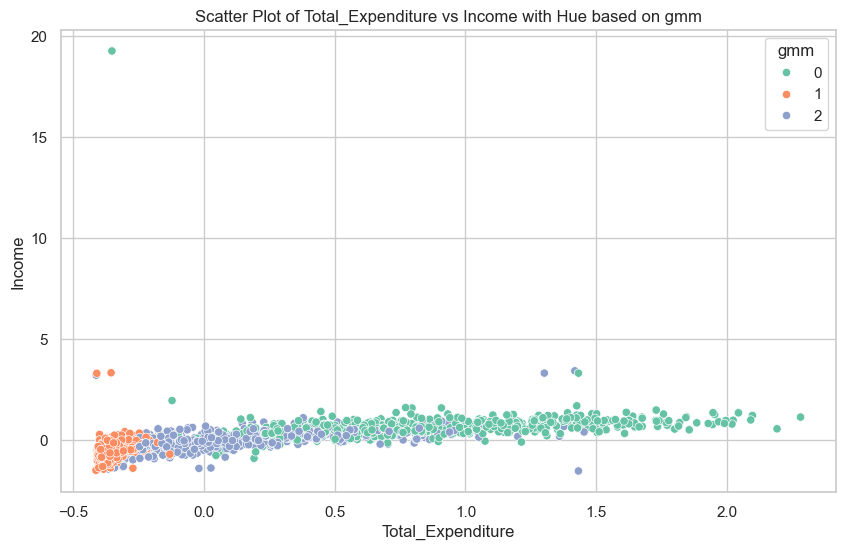

In [786]:
import seaborn as sns
import matplotlib.pyplot as plt

def scatter_plot_with_hue(data, x_col, y_col, hue_col):
    """
    Create a scatter plot with hue based on a categorical column.

    Parameters:
    - data: pandas DataFrame
    - x_col: str, name of the column for x-axis
    - y_col: str, name of the column for y-axis
    - hue_col: str, name of the categorical column for hue
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Create scatter plot with hue
    sns.scatterplot(x=x_col, y=y_col, hue=hue_col, data=data, palette="Set2")

    # Customize the plot
    plt.title(f'Scatter Plot of {x_col} vs {y_col} with Hue based on {hue_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title=hue_col)

    # Show the plot
    plt.show()

# Assuming you have X_train and Y_train dataframes
# Replace 'Total_Expenditure' and 'Income' with your actual column names
scatter_plot_with_hue(data=pd.concat([X_train, y_train], axis=1), x_col='Total_Expenditure', y_col='Income', hue_col=method_used)


In [788]:
train_df=pd.concat([X_train,y_train],axis=1)

train_df[method_used]=train_labels

In [789]:
test_df=pd.concat([X_test,y_test],axis=1)

test_df[method_used]=test_labels

In [791]:
#Define name of customer groups according to clusters
re_clust = {
    1: 'Avg customer',
    0: 'Potentially Good customer',
    2: 'Good customer'}
train_df['Clusters_Customers'] = train_df[method_used].map(re_clust)
test_df['Clusters_Customers'] = test_df[method_used].map(re_clust)

d:\Resume_Projects\Clustering\.venv\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Resume_Projects\Clustering\.venv\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 82.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Hitesh\AppData\Local\Temp\ipykernel_11740\3005799785.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.boxenplot(x=df[cluster_col], y=df[y_col], palette=pal)
d:\Resume_Projects\Clustering\.venv\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.w

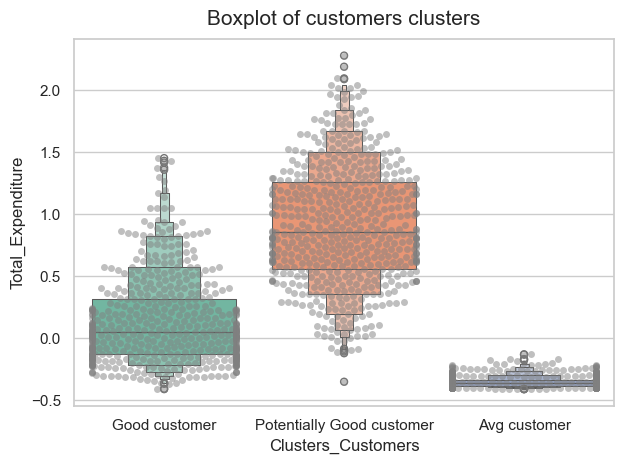

In [792]:
def plot_cluster_boxplot(df, cluster_col, y_col):
    # Set the style of the plot
    sns.set(style="whitegrid")

    # Create the box plot
    plt.figure()
    pal = sns.color_palette("Set2", df[cluster_col].nunique())
    pl = sns.swarmplot(x=df[cluster_col], y=df[y_col], color="gray", alpha=0.5)
    pl = sns.boxenplot(x=df[cluster_col], y=df[y_col], palette=pal)
    pl.set_title("Boxplot of customers clusters", pad=10, size=15)

    # Adjust the plot layout
    plt.tight_layout()

    # Show the plot
    plt.show()
    
plot_cluster_boxplot(df=train_df,cluster_col='Clusters_Customers',y_col='Total_Expenditure')